In [1]:
import matplotlib.pyplot as plt
import numpy as np
import CombineColors as CC
from matplotlib import rcParams
COLOR = 'white'
rcParams['text.color'] = COLOR

CombineColors.py

The main purpose of the module is to visualize multiple grayscale channels, in a laying-over, blending, or additive manner (see below).

It depends on the PIL image package.

For colors, it takes color names in the default color list, or an uint8 (r,g,b) tuple (0, 255). Custome colors can also be added.

1. 

    getcolornames( includeAbbr = True )


You can get all default colors with getcolornames(). 8 basic channels (YMC, RGB and WB) also have abbreviations for convenience. (e.g. 'y' is the same as 'yellow.)

Channels other than the 8 basic channels are selected in an attempt to be distinctive as well as color-blind friendly.

In [2]:
print(CC.getcolornames())
print(CC.getcolornames(includeAbbr=False))

['cyan', 'magenta', 'yellow', 'red', 'blue', 'green', 'perano', 'onahau', 'seagull', 'deco', 'primerose', 'pink', 'silver', 'apricot', 'teal', 'cerise', 'purple', 'olive', 'wine', 'sundance', 'white', 'black', 'c', 'm', 'y', 'r', 'b', 'g', 'w', 'd']
['cyan', 'magenta', 'yellow', 'red', 'blue', 'green', 'perano', 'onahau', 'seagull', 'deco', 'primerose', 'pink', 'silver', 'apricot', 'teal', 'cerise', 'purple', 'olive', 'wine', 'sundance', 'white', 'black']


2. 

    legendbar(c_dict = colors_default, width = 1)

It generate a virticle matplotlib style colorbar. c_dict is a dictionary in the form {pagename: colorname} or {pagename: (r,g,b)}.

You can use legendbar() without a color dictionaory to easily visualize all the default colors. Be sure to set a large pyplot figure size to unpack all the texts. The width argument doesn't really affect anything.

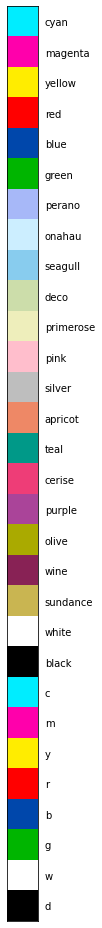

In [3]:
plt.figure(figsize = (8,13))
CC.legendbar(width=1)
plt.tight_layout()

3. 

    Im = CombineColor(pages, pagecolors = {}, bg = 'black', mode = 'layer', palette = {}, addlegend = True, normalize = True, colors_default = colors_default):

Returns a PIL image, which can be saved directly with Im.sage('filename.png'), or shown with plt.imshow(Im), or converted to np array by np.array(Im).

    Inputs:
        pages: either a dict {pagename : grayscale_data}, or a 3d np array stacked along the 3rd axis. type and range of the data is not limited.
               pages will be numbered in legends if page names are not provided.

        pagecolors: either a dict {pagename : colorname}, or a list/array of colornames. Channels not assigned colors will be colored automatically.
               

        bg: background color. Shown when all channels are 0 at this pixel. 

        mode: can be "layer", "blend" or "add".
            layer: overlapped areas shown as the latest channel.
            blend: overlapped areas shown as intermediate colors, as the colors are mixed. 
            add: overlapped areas shown as the added colors, as the colored beams add up as white light.

        palette: a dict {colorname : (r, g, b)} for custome colors. rgb values are (0, 255). 

        addlegend: bool. whether adding legend at the bottom of the image. default = True. Helpful if generating standalong image. 

        normalize: bool. If true, each channel will be independently max-normalized to (0,1) first. default = True. (recommended)
        
        colors_default: Default palette. Set it to {} if only using custome colors.

MCY colors are great for "blend" mode (e.g., colocalization of proteins).

RGB colors are fine for "blend" (because the RGB used are not pure RGB here) but not as good.

Text(0.5, 0.98, 'Blend')

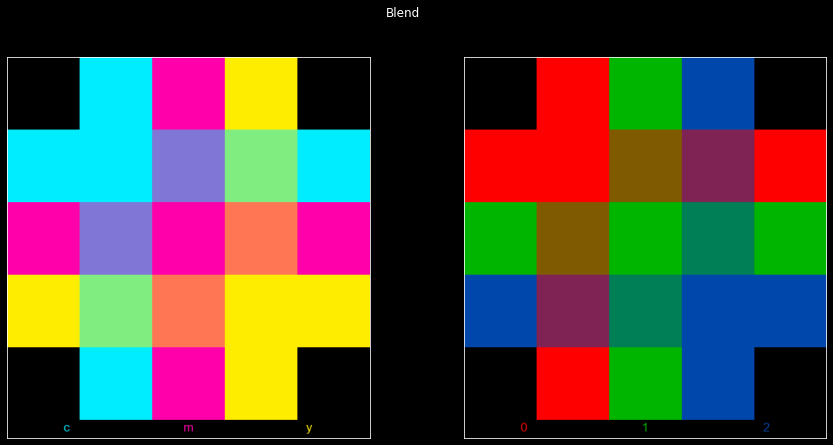

In [4]:
colors_CMY = ['c','m','y']
ims_CMY = {}
f = 100
n = len(colors_CMY) + 2
for i, c in enumerate(colors_CMY):
    im = np.zeros((n*f,n*f))
    im[(i+1)*f:(i+2)*f,:] = 1
    im[:, (i+1)*f:(i+2)*f] = 1
    ims_CMY[c] = im

colors_RGB = ['r','g','b']
f = 100
n = len(colors_RGB) + 2
ims_RGB = np.zeros((f*n,f*n, len(colors_RGB) ))
for i, c in enumerate(colors_RGB):
    im = np.zeros((n*f,n*f))
    im[(i+1)*f:(i+2)*f,:] = 1
    im[:, (i+1)*f:(i+2)*f] = 1
    ims_RGB[:,:,i] = im

plt.figure(facecolor=(0,0,0), figsize=(15,7))
plt.subplot(121)
plt.imshow(CC.CombineColor(pages = ims_CMY, pagecolors={c:c for c in colors_CMY}, mode='blend')) # ims_CMY is a dict, pagecolors is a dict
CC.axisoff()
CC.whiteframe()
plt.subplot(122)
plt.imshow(CC.CombineColor(pages = ims_RGB, pagecolors=colors_RGB, mode='blend')) # imc_RGB is a 3D array, pagecolors is a list. 
#(It has to be a list if pages doesn't have keys, or otherwise colors will be assigned from top of the default list.)
CC.axisoff()
CC.whiteframe()
plt.suptitle('Blend')


In "add" mode, overlapping colors will easily end up being zero. RGB works better than CMY in this case.

Text(0.5, 0.98, 'Add')

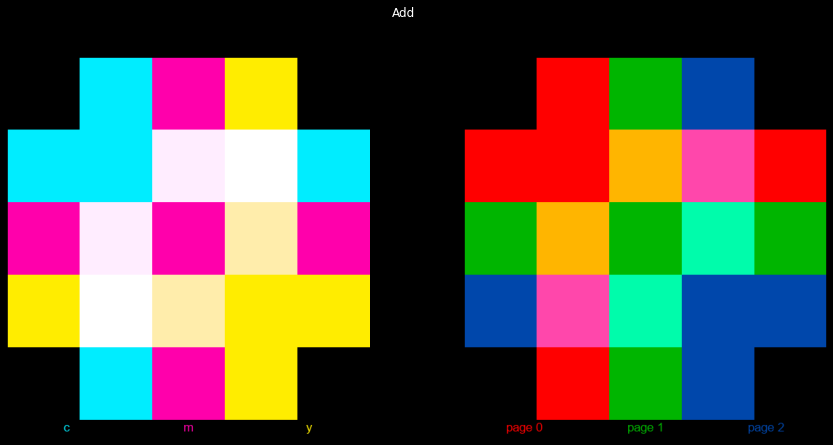

In [5]:
plt.figure(facecolor=(0,0,0), figsize=(15,7))
plt.subplot(121)
plt.imshow(CC.CombineColor(pages = ims_CMY, pagecolors={c:c for c in colors_CMY}, mode='add'))
CC.axisoff()
plt.subplot(122)
plt.imshow(CC.CombineColor(pages = {f'page {i}': ims_RGB[:,:,i] for i,c in enumerate(colors_RGB)}, pagecolors={f'page {i}': c for i,c in enumerate(colors_RGB)}, mode='add'))
CC.axisoff()
plt.suptitle('Add')

In "layer" mode, the pages are stacked on each other without blending.

Below example shows when only some of the pages are provided with a color, the other pages will be assigned from top of color list. (it happens to be the order of CMY)

Text(0.5, 0.98, 'Layer')

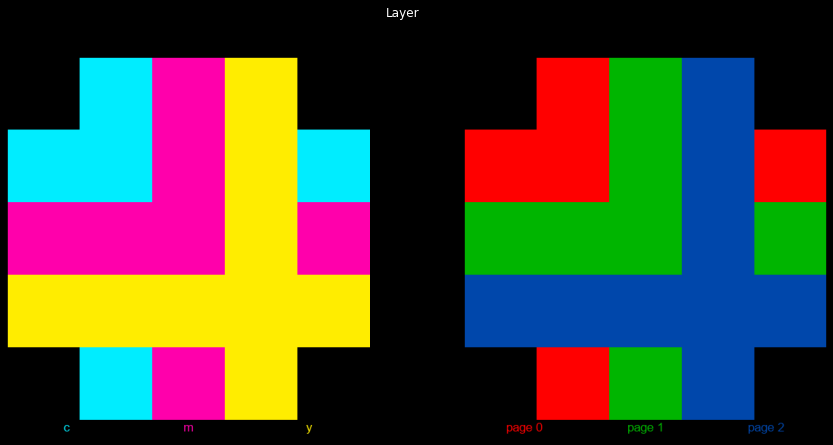

In [6]:
plt.figure(facecolor=(0,0,0), figsize=(15,7))
plt.subplot(121)
plt.imshow(CC.CombineColor(pages = ims_CMY, pagecolors={'y':'yellow'}, mode='layer'))
CC.axisoff()
plt.subplot(122)
plt.imshow(CC.CombineColor(pages = {f'page {i}': ims_RGB[:,:,i] for i,c in enumerate(colors_RGB)}, 
                            pagecolors={f'page {i}': c for i,c in enumerate(colors_RGB)}, 
                            mode='layer'))
CC.axisoff()
plt.suptitle('Layer')

"Layer" mode is useful in cases where each pixel is solid and for sure to have only one color (e.g, annotation map)

Here is a demo generating such an annotaion map.

In [7]:
import pandas as pd
df = pd.read_csv('4731065_classes.csv')
print(df.columns)


Index(['Unnamed: 0', 'Tile', 'Class'], dtype='object')


In [8]:
X = [int(c.split('_')[0]) for c in df['Tile']]
Y = [int(c.split('_')[1]) for c in df['Tile']]
classes = np.unique(df.Class)
print(classes)
print(CC.getcolornames(False))

['Broad normal dermis' 'Eccrine' 'Epidermotropism' 'Fat'
 'Folliculotropism' 'Lymphoma' 'Unannotated']
['cyan', 'magenta', 'yellow', 'red', 'blue', 'green', 'perano', 'onahau', 'seagull', 'deco', 'primerose', 'pink', 'silver', 'apricot', 'teal', 'cerise', 'purple', 'olive', 'wine', 'sundance', 'white', 'black']


In [9]:
padding = 10
xmin = max(np.min(X) - padding, 0)
ymin = max(np.min(Y) - padding, 0)
X = X - xmin
Y = Y - ymin
xmax = np.max(X) + padding
ymax = np.max(Y) + padding

classes_dict = {}
for t in classes:
    mat = np.zeros((xmax, ymax))
    x = X[df.Class == t]
    y = Y[df.Class == t]
    mat[x, y] = 1
    classes_dict[t] = mat


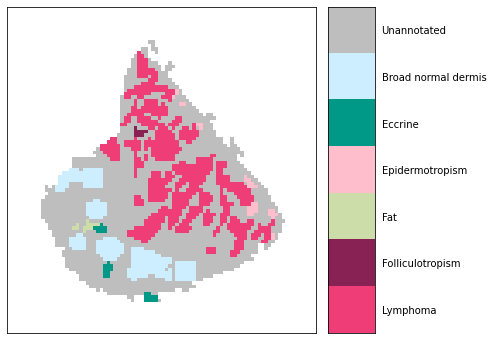

In [18]:
# make_axes_locatable is used to set sizes for the legend bar
from mpl_toolkits.axes_grid1 import make_axes_locatable

class_colors = {
    'Unannotated': 'silver',
    'Broad normal dermis': 'onahau',
    'Eccrine': 'teal',
    'Epidermotropism': 'pink',
    'Fat': 'deco',
    'Folliculotropism': 'wine',
    'Lymphoma': 'cerise',
}

plt.figure(figsize=(9,6), facecolor='white')
Im = CC.CombineColor(pages = classes_dict, 
                pagecolors = class_colors, bg ='white', mode = 'layer', addlegend=False )
plt.imshow(Im)
CC.axisoff()
divider = make_axes_locatable(plt.gca())
cax2 = divider.append_axes("right", size="18%", pad=0.1)
CC.legendbar(class_colors)
